# 01: Supervised vs unsupervised learning

### p11 Clustering of MNIST numeric handwriting data

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
 
from sklearn import datasets 
from sklearn import manifold 
 
%matplotlib inline 

In [2]:
data = datasets.fetch_openml( 
                  'mnist_784',  
                  version=1,  
                  return_X_y=True 
) 
pixel_values, targets = data 
targets = targets.astype(int) 

In [3]:
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [4]:
pixel_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
targets

array([5, 0, 4, ..., 4, 5, 6])

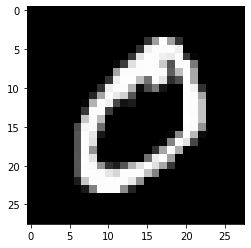

In [6]:
single_image = pixel_values[1, :].reshape(28, 28) 
 
plt.imshow(single_image, cmap='gray') 

In [7]:
%%time
# Jupyter notebook でセルの実行時間を測定

tsne = manifold.TSNE(n_components=2, random_state=42) 
 
transformed_data = tsne.fit_transform(pixel_values[:3000, :]) 

Wall time: 25.7 s


In [8]:
transformed_data

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

In [9]:
transformed_data.shape

(3000, 2)

In [10]:
tsne_df = pd.DataFrame( 
    np.column_stack((transformed_data, targets[:3000])),  
    columns=["x", "y", "targets"] 
) 
 
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int) 

In [11]:
tsne_df

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
...,...,...,...
2995,9.038110,58.850792,7
2996,-29.405334,-60.951775,0
2997,13.466378,47.369007,9
2998,-2.435752,7.983772,1


C:\Users\iiats\Anaconda3\envs\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


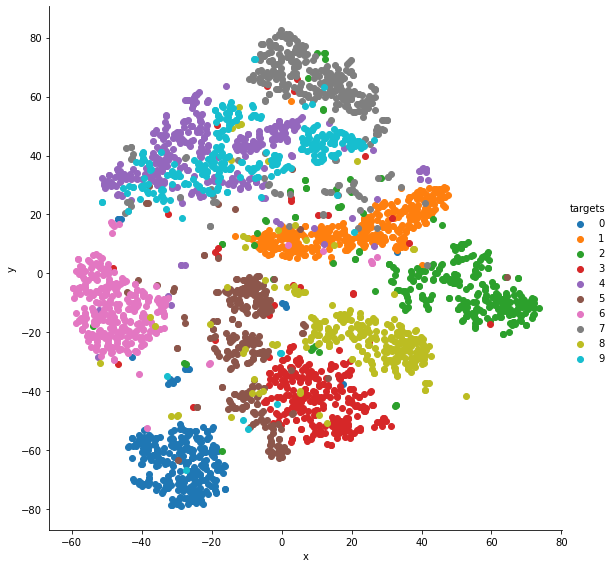

In [12]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8) 
 
grid.map(plt.scatter, "x", "y").add_legend() 

## PCA, k-Means でもやってみた

### PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
%%time
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(pixel_values[:3000, :]) 

Wall time: 69 ms


PCAの計算は速い。t-SNE は 32.1 s かかっていた。

In [15]:
transformed_data

array([[ 163.26897874,  346.42379426],
       [1077.7312226 ,  389.64871737],
       [ -75.70058249, -416.9347971 ],
       ...,
       [-457.94730429, -196.71374188],
       [-742.24336096,   63.14015954],
       [  69.89931383,  157.17962448]])

In [16]:
transformed_data.shape

(3000, 2)

In [17]:
pca_df = pd.DataFrame( 
    np.column_stack((transformed_data, targets[:3000])),  
    columns=["x", "y", "targets"] 
) 
 
pca_df.loc[:, "targets"] = tsne_df.targets.astype(int) 

In [18]:
pca_df.head()

,x,y,targets
0,163.268979,346.423794,5
1,1077.731223,389.648717,0
2,-75.700582,-416.934797,4
3,-909.506266,617.922935,1
4,-344.806142,-716.562650,9


C:\Users\iiats\Anaconda3\envs\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


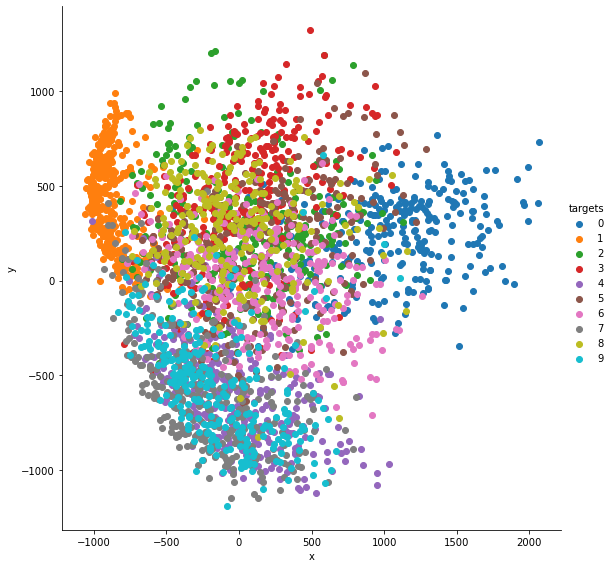

In [19]:
grid = sns.FacetGrid(pca_df, hue="targets", size=8) 
 
grid.map(plt.scatter, "x", "y").add_legend() 

PCA でが上手くクラスタリングできていない。

## k-Means

In [20]:
from sklearn.cluster import KMeans

In [21]:
%%time
kms = KMeans(n_clusters=2)
transformed_data = kms.fit_transform(pixel_values[:3000, :]) 

Wall time: 692 ms


In [22]:
kms_df = pd.DataFrame( 
    np.column_stack((transformed_data, targets[:3000])),  
    columns=["x", "y", "targets"] 
) 
 
kms_df.loc[:, "targets"] = tsne_df.targets.astype(int) 
kms_df.head()

,x,y,targets
0,1795.557622,1886.974296,5
1,1720.916952,2153.526191,0
2,2096.417670,1921.848555,4
3,1987.026174,1570.952063,1
4,1964.971295,1547.960173,9


C:\Users\iiats\Anaconda3\envs\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


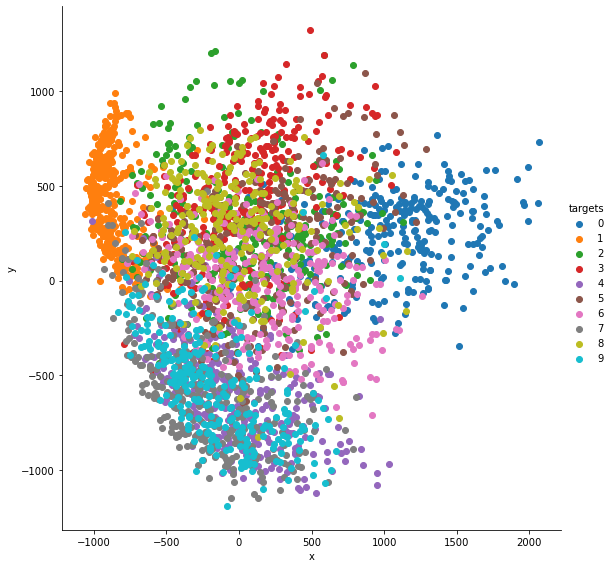

In [23]:
grid = sns.FacetGrid(pca_df, hue="targets", size=8) 
 
grid.map(plt.scatter, "x", "y").add_legend() 

k-Means ではさらに団子状態。いかに t-SNE の分離能が高いかわかる。

t-SNE についての参考記事：https://qiita.com/stfate/items/8988d01aad9596f9d586

t-SNE のライブラリはいくつか公開されています。

公式実装: https://lvdmaaten.github.io/tsne/  
scikit-learn.manifold.TSNE: https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne  
bhtsne: https://github.com/lvdmaaten/bhtsne  
python-bhtsne: https://github.com/dominiek/python-bhtsne  